In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read files as dataframes
train_df = pd.read_json("./data/subtaskB_train.jsonl", lines=True)
dev_df = pd.read_json("./data/subtaskB_dev.jsonl", lines=True)

In [9]:
# Number of sampels
print("Number of samples in train set:", len(train_df))
print("Number of samples in dev set:", len(dev_df))

Number of samples in train set: 71027
Number of samples in dev set: 3000


In [16]:
# Distribution of labels
label_counts_train = train_df['model'].value_counts()
label_counts_dev = dev_df['model'].value_counts()

print("Train set label distribution\n", label_counts_train)
print("Dev set label distribution\n", label_counts_dev)

Train set label distribution
 davinci    11999
bloomz     11998
human      11997
chatGPT    11995
dolly      11702
cohere     11336
Name: model, dtype: int64
Dev set label distribution
 chatGPT    500
human      500
davinci    500
cohere     500
bloomz     500
dolly      500
Name: model, dtype: int64


In [14]:
# Distribution of sources
source_counts_train = train_df['source'].value_counts()
source_counts_dev = dev_df['source'].value_counts()

print("Train set source distribution\n", source_counts_train)
print("Dev set source distribution\n", source_counts_dev)

Train set source distribution
 wikihow      17999
reddit       17999
arxiv        17997
wikipedia    17032
Name: source, dtype: int64
Dev set source distribution
 peerread    3000
Name: source, dtype: int64


<Figure size 1000x600 with 0 Axes>

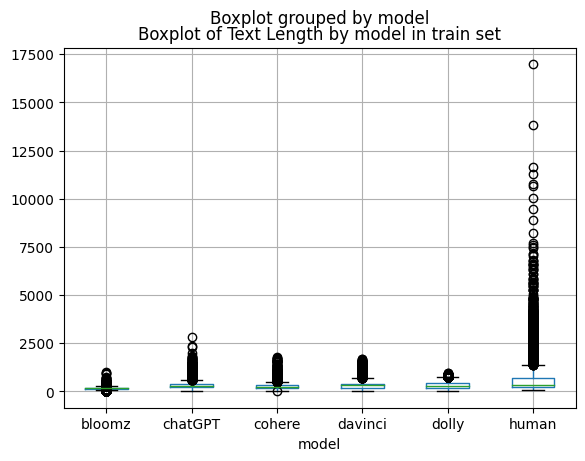

<Figure size 1000x600 with 0 Axes>

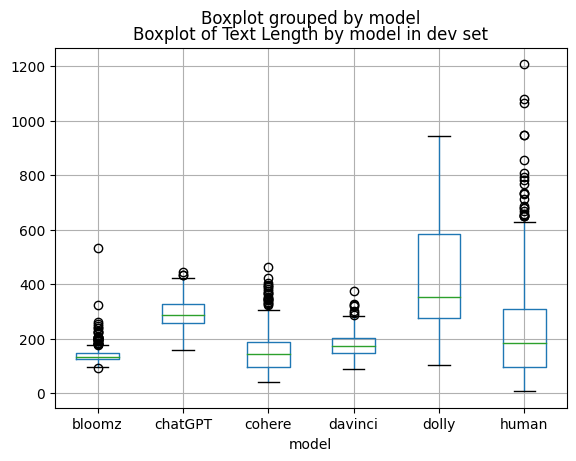

In [19]:
# Distribution of token counts overall
train_df['token_count'] = train_df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
train_df.boxplot(column='token_count', by='model')
plt.title('Boxplot of Text Length by model in train set')
plt.show()

dev_df['token_count'] = dev_df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
dev_df.boxplot(column='token_count', by='model')
plt.title('Boxplot of Text Length by model in dev set')
plt.show()

Text Length per model in train set

Statistics for chatGPT:
count    11995.000000
mean       362.187495
std        227.771859
min         36.000000
25%        225.000000
50%        272.000000
75%        377.000000
max       2830.000000
Name: token_count, dtype: float64


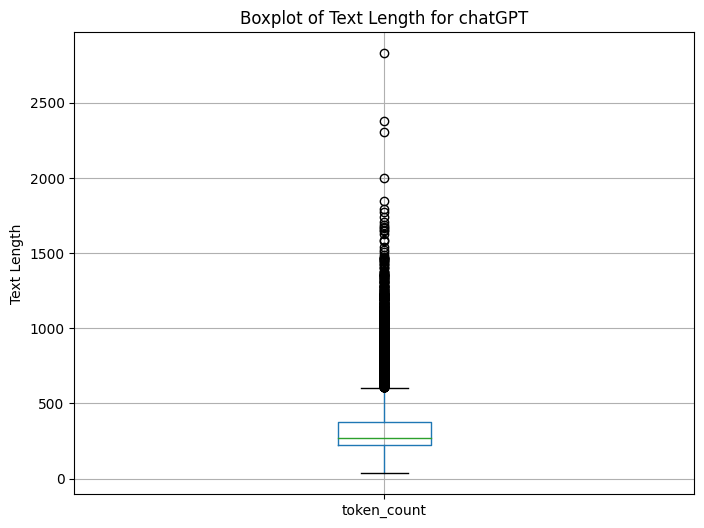


Statistics for human:
count    11997.000000
mean       607.168459
std        778.616315
min         80.000000
25%        213.000000
50%        313.000000
75%        685.000000
max      16991.000000
Name: token_count, dtype: float64


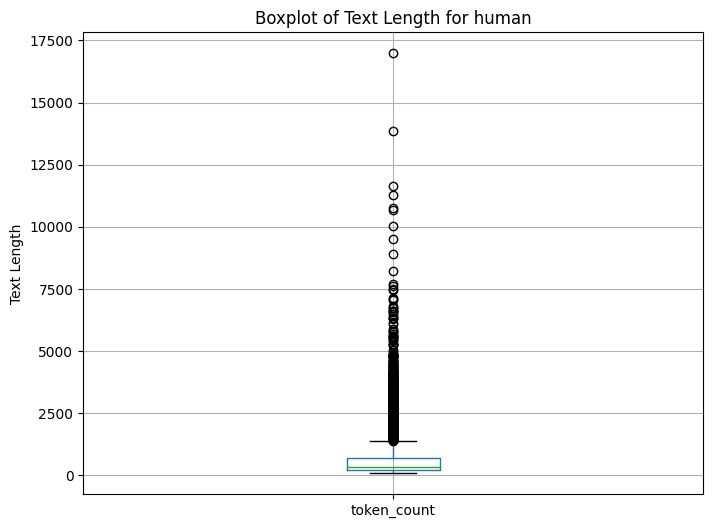


Statistics for cohere:
count    11336.000000
mean       279.015173
std        144.028681
min          6.000000
25%        196.000000
50%        247.000000
75%        321.000000
max       1791.000000
Name: token_count, dtype: float64


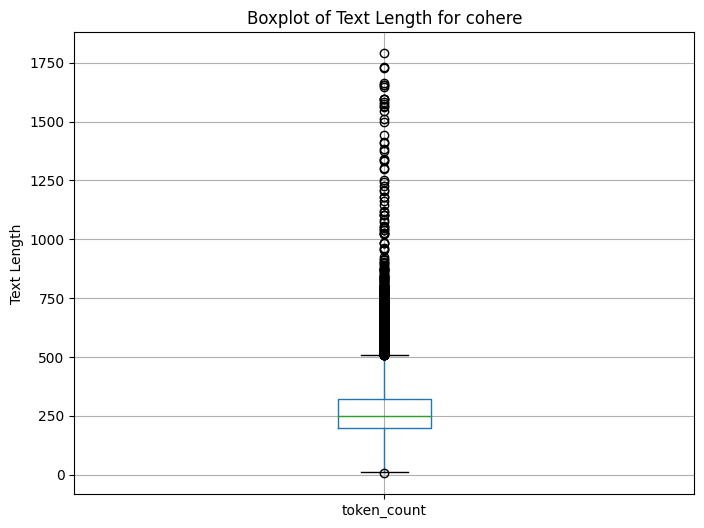


Statistics for davinci:
count    11999.000000
mean       343.303609
std        210.334040
min          8.000000
25%        195.000000
50%        324.000000
75%        398.000000
max       1669.000000
Name: token_count, dtype: float64


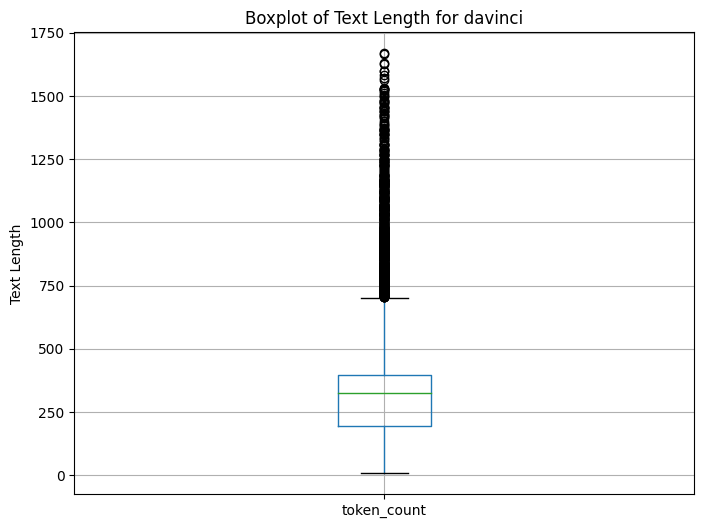


Statistics for bloomz:
count    11998.000000
mean       161.720453
std         77.310506
min          1.000000
25%        132.000000
50%        160.000000
75%        186.000000
max       1010.000000
Name: token_count, dtype: float64


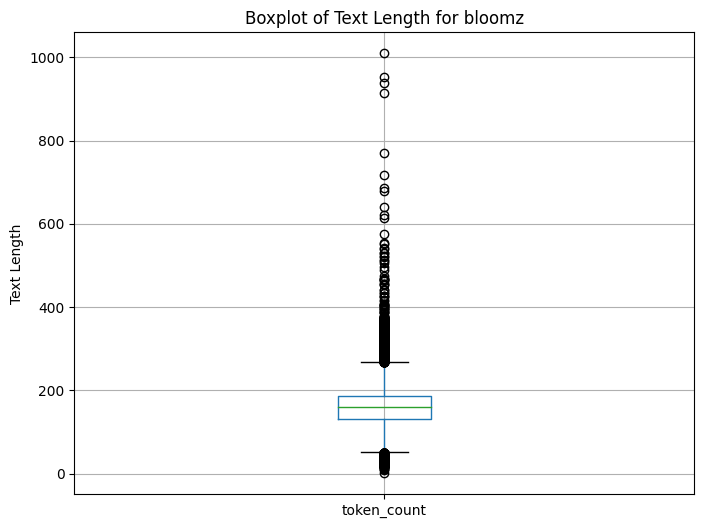


Statistics for dolly:
count    11702.000000
mean       326.269868
std        179.139914
min         31.000000
25%        197.000000
50%        256.000000
75%        417.000000
max        967.000000
Name: token_count, dtype: float64


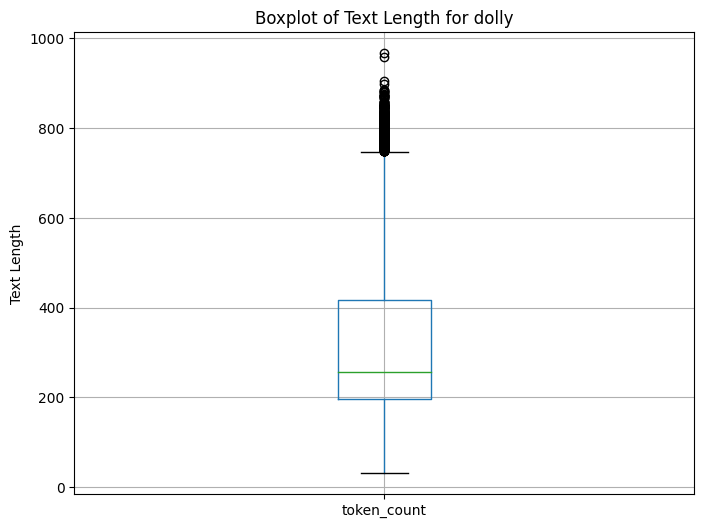


Text Length per model in dev set

Statistics for chatGPT:
count    500.000000
mean     292.580000
std       50.439229
min      158.000000
25%      257.000000
50%      288.000000
75%      327.000000
max      444.000000
Name: token_count, dtype: float64


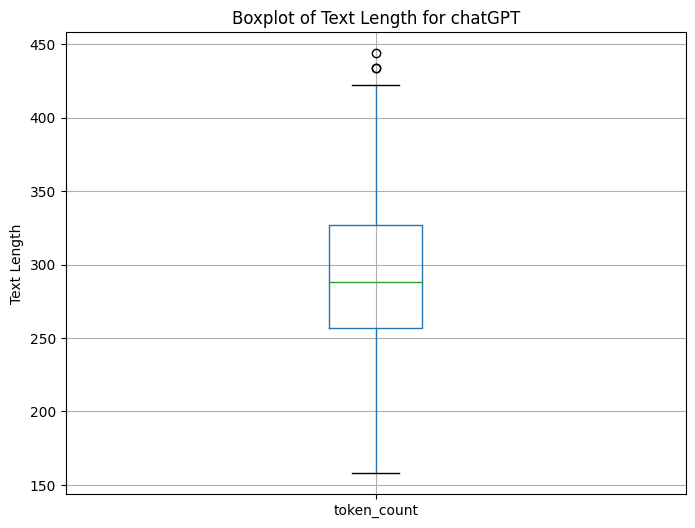


Statistics for human:
count     500.000000
mean      228.960000
std       188.541556
min         6.000000
25%        94.000000
50%       184.000000
75%       308.500000
max      1208.000000
Name: token_count, dtype: float64


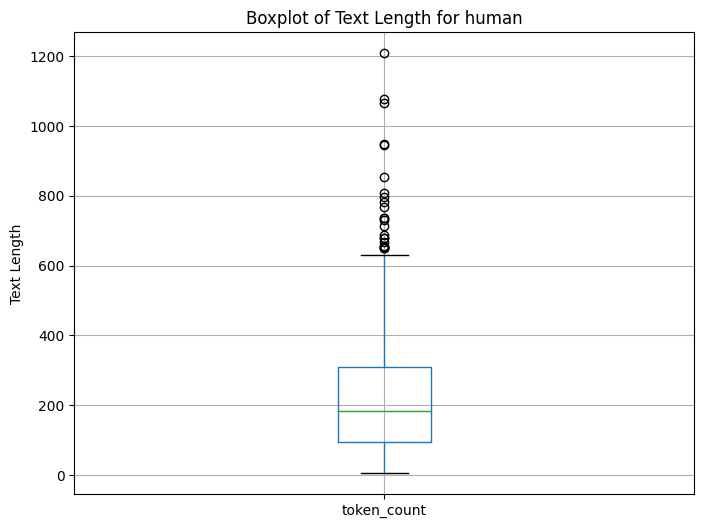


Statistics for davinci:
count    500.000000
mean     177.982000
std       42.371457
min       88.000000
25%      148.000000
50%      171.500000
75%      202.000000
max      373.000000
Name: token_count, dtype: float64


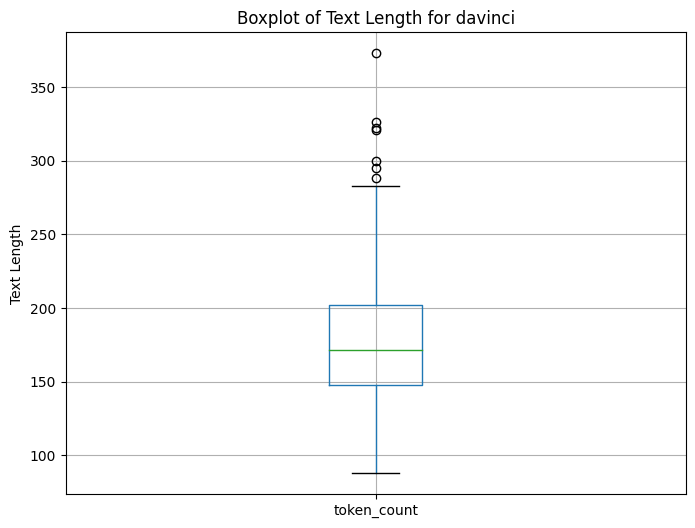


Statistics for cohere:
count    500.000000
mean     151.854000
std       73.623975
min       40.000000
25%       96.000000
50%      143.500000
75%      186.000000
max      461.000000
Name: token_count, dtype: float64


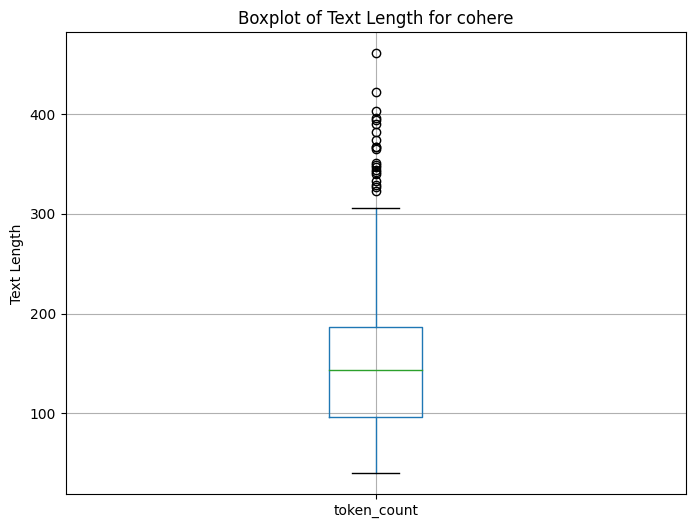


Statistics for bloomz:
count    500.000000
mean     140.018000
std       30.339589
min       92.000000
25%      125.000000
50%      133.000000
75%      146.000000
max      533.000000
Name: token_count, dtype: float64


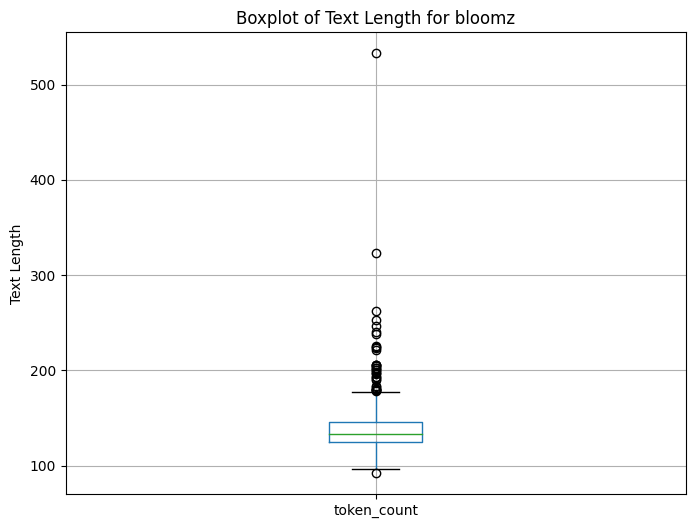


Statistics for dolly:
count    500.000000
mean     440.256000
std      203.949369
min      104.000000
25%      275.750000
50%      353.000000
75%      582.250000
max      945.000000
Name: token_count, dtype: float64


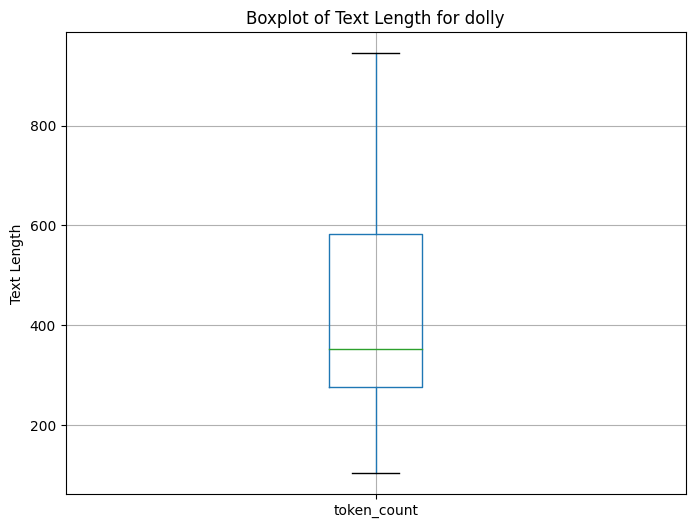

In [23]:
# Distribution of token counts per label
print('Text Length per model in train set')
models = train_df['model'].unique()
for model in models:
    model_df = train_df[train_df['model'] == model]
    print(f'\nStatistics for {model}:')
    print(model_df['token_count'].describe())
    plt.figure(figsize=(8, 6))
    model_df.boxplot(column='token_count')
    plt.title(f'Boxplot of Text Length for {model}')
    plt.ylabel('Text Length')
    plt.show()

print('\nText Length per model in dev set')
models = dev_df['model'].unique()
for model in models:
    model_df = dev_df[dev_df['model'] == model]
    print(f'\nStatistics for {model}:')
    print(model_df['token_count'].describe())
    plt.figure(figsize=(8, 6))
    model_df.boxplot(column='token_count')
    plt.title(f'Boxplot of Text Length for {model}')
    plt.ylabel('Text Length')
    plt.show()
